In [1]:
# import modules for data handling
import pandas as pd
import numpy as np
import scipy.stats as st

# import modules for fitting
from scipy.optimize import curve_fit
import uncertainties as unc
import uncertainties.unumpy as unp

# import modules for plotting
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# import functions for prepping data
from error_correction_paper.prep_data import generate_bins
from error_correction_paper.prep_data import generate_dfs_from_file_mon
from error_correction_paper.prep_data import generate_dfs_from_file_unsync
from error_correction_paper.prep_data import generate_bins_mad2

# import functions for plotting data
from error_correction_paper.plot_data import plot_expo_with_error_unp
from error_correction_paper.plot_data import plot_only_symm_gumbel
from error_correction_paper.plot_data import plot_symm_gumbel_fullnorm_piecewise
from error_correction_paper.plot_data import plot_asymm_gumbel_ke_binom_piecewise

# adjust options for display
pd.options.mode.chained_assignment = None
%matplotlib inline
plt.rcParams.update({'errorbar.capsize': 2})
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20) 
plt.rc('font', family='Helvetica') 
plt.rc('legend', fontsize=15) 
plt.rc('xtick', labelsize=15)   
plt.rc('ytick', labelsize=15)   

# Introduction

This notebook contains the code to generate the figures in `Measuring and modeling the dynamics of mitotic error correction` by Ha et al. 

# Import data

In [2]:
# import control Mad2 RNAi data
imported_df_mad2 = pd.read_csv('data/cGH07_control_Mad2RNAi.csv')
anaphase_df_mad2 = imported_df_mad2.dropna(subset=['NEBD time','anaphase onset time','anaphase onset time - NEBD time'])
anaphase_df_mad2 = anaphase_df_mad2[anaphase_df_mad2['AZ addition time (min)']=='no Mps1i']
anaphase_df_mad2 = anaphase_df_mad2[pd.to_numeric(anaphase_df_mad2['NEBD time'],errors='coerce').notnull()]
anaphase_df_mad2 = anaphase_df_mad2[pd.to_numeric(anaphase_df_mad2['anaphase onset time - NEBD time'],errors='coerce').notnull()]
anaphase_times_mad2 = anaphase_df_mad2['anaphase onset time - NEBD time'].astype(int).to_numpy()
print('number of anaphase times: ',len(anaphase_times_mad2))
cleaned_df_mad2 = imported_df_mad2.dropna(subset=['N1','N2','dNk'])
cleaned_df_mad2 = cleaned_df_mad2[pd.to_numeric(cleaned_df_mad2['dNk'],errors='coerce').notnull()]
cleaned_df_mad2= cleaned_df_mad2.astype({'dNk': 'float'})

number of anaphase times:  56


In [3]:
# import UMK57 Mad2 RNAi data
imported_df_mad2_umk = pd.read_csv('data/cGH07_UMK57_Mad2RNAi.csv')
anaphase_df_mad2_umk = imported_df_mad2_umk.dropna(subset=['NEBD time','anaphase onset time','anaphase onset time - NEBD time'])
anaphase_df_mad2_umk = anaphase_df_mad2_umk[anaphase_df_mad2_umk['AZ addition time (min)']=='no Mps1i']
anaphase_df_mad2_umk = anaphase_df_mad2_umk[pd.to_numeric(anaphase_df_mad2_umk['NEBD time'],errors='coerce').notnull()]
anaphase_df_mad2_umk = anaphase_df_mad2_umk[pd.to_numeric(anaphase_df_mad2_umk['anaphase onset time'],errors='coerce').notnull()]
anaphase_df_mad2_umk = anaphase_df_mad2_umk[pd.to_numeric(anaphase_df_mad2_umk['anaphase onset time - NEBD time'],errors='coerce').notnull()]
anaphase_times_mad2_umk = anaphase_df_mad2_umk['anaphase onset time - NEBD time'].astype(int).to_numpy()
print('number of anaphase times: ',len(anaphase_times_mad2_umk))
cleaned_df_mad2_umk = imported_df_mad2_umk.dropna(subset=['N1','N2','dNk'])
cleaned_df_mad2_umk = cleaned_df_mad2_umk[pd.to_numeric(cleaned_df_mad2_umk['dNk'],errors='coerce').notnull()]
cleaned_df_mad2_umk= cleaned_df_mad2_umk.astype({'dNk': 'float'})
cleaned_df_mad2_umk['N1'] = pd.to_numeric(cleaned_df_mad2_umk['N1'],errors='coerce')
cleaned_df_mad2_umk = cleaned_df_mad2_umk.dropna(subset=['N1'])
cleaned_df_mad2_umk['N1']=cleaned_df_mad2_umk['N1'].astype(int)
cleaned_df_mad2_umk = cleaned_df_mad2_umk[cleaned_df_mad2_umk['N1']!='']

number of anaphase times:  68


In [4]:
# import monastrol washout Mad2 RNAi data
imported_df_mad2_mon = pd.read_csv('data/cGH07_monastrol_Mad2RNAi.csv')
anaphase_df_mad2_mon = imported_df_mad2_mon.dropna(subset=['anaphase onset time'])
anaphase_df_mad2_mon = anaphase_df_mad2_mon[anaphase_df_mad2_mon['AZ addition time (min)']=='no Mps1i']
anaphase_df_mad2_mon = anaphase_df_mad2_mon[pd.to_numeric(anaphase_df_mad2_mon['anaphase onset time'],errors='coerce').notnull()]
anaphase_times_mad2_mon = anaphase_df_mad2_mon['anaphase onset time'].astype(int).to_numpy()
print('number of anaphase times: ',len(anaphase_times_mad2_mon))
cleaned_df_mad2_mon = imported_df_mad2_mon.dropna(subset=['N1','N2','dNk'])
cleaned_df_mad2_mon = cleaned_df_mad2_mon[pd.to_numeric(cleaned_df_mad2_mon['dNk'],errors='coerce').notnull()]
cleaned_df_mad2_mon= cleaned_df_mad2_mon.astype({'dNk': 'float'})
cleaned_df_mad2_mon['N1'] = pd.to_numeric(cleaned_df_mad2_mon['N1'],errors='coerce')
cleaned_df_mad2_mon = cleaned_df_mad2_mon.dropna(subset=['N1'])
cleaned_df_mad2_mon['N1']=cleaned_df_mad2_mon['N1'].astype(int)
cleaned_df_mad2_mon = cleaned_df_mad2_mon[cleaned_df_mad2_mon['N1']!='']

number of anaphase times:  89


In [5]:
foldername = 'data'

# load control and UMK57 data
anaphase_df_ctrl,anaphase_times_ctrl,cleaned_df_ctrl,unforced_df_ctrl,unforced_dNk_ctrl=generate_dfs_from_file_unsync(foldername,'cGH07_control')
anaphase_df_umk,anaphase_times_umk,cleaned_df_umk,unforced_df_umk,unforced_dNk_umk=generate_dfs_from_file_unsync(foldername,'cGH07_UMK57')

# load monastrol data
df_errorbar_mon,anaphase_df_mon,anaphase_times_mon,unforced_dNk_mon,cleaned_df_mon=generate_dfs_from_file_mon(foldername,'cGH07_monastrol')

# generate control and UMK57 dictionaries
dict_ctrl = generate_bins(cleaned_df_ctrl,2,0,14)
dict_umk = generate_bins(cleaned_df_umk,2,0,16)

# generate monastrol washout dictionary
dict_mon=dict({'means':df_errorbar_mon['meansq'][:6],'stds':df_errorbar_mon['stdsq'][:6],'sems':df_errorbar_mon['semsq'][:6],'times':np.array([5,10,15,20,25,30]),'plot_times':np.linspace(5,30)})
dict_mad2_mon = generate_bins_mad2(cleaned_df_mad2_mon['anaphase onset time']-2,cleaned_df_mad2_mon['dNk']**2,5,7,41)

/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Applications/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# Figure 1

## Figure 1D: Histogram of |ΔN| values for unperturbed control cells

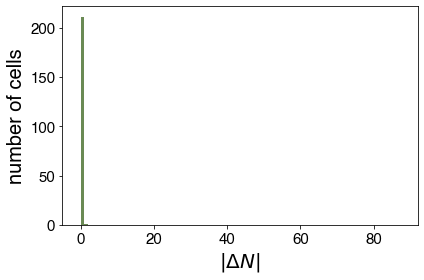

In [6]:
data = unforced_dNk_ctrl
nbins = 2
plt.hist(data,bins=nbins,color= '#6a8a54');
plt.xlim([-5,92])
plt.xlabel(r'$|\Delta N|$');
plt.ylabel('number of cells');
plt.tight_layout();

## Figure 1F: Histogram of |ΔN| values for cells forced into anaphase after NEBD!

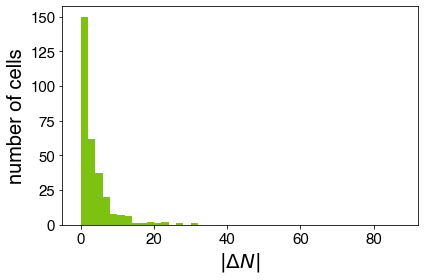

In [7]:
data = cleaned_df_ctrl[(cleaned_df_ctrl['Mps1i time - NEBD time'].astype(int)<16) & (cleaned_df_ctrl['Mps1i time - NEBD time'].astype(int)>=0)]['dNk']
nbins = int((np.unique(data)[-1]-np.unique(data)[0])//2)
plt.hist(data,bins=nbins,color='#7ec211')
plt.xlim([-5,92])
plt.xlabel(r'$|\Delta N|$');
plt.ylabel('number of cells');
plt.tight_layout();

# Figure 2

## Figure 2B: Histograms of |ΔN| for each forced anaphase time

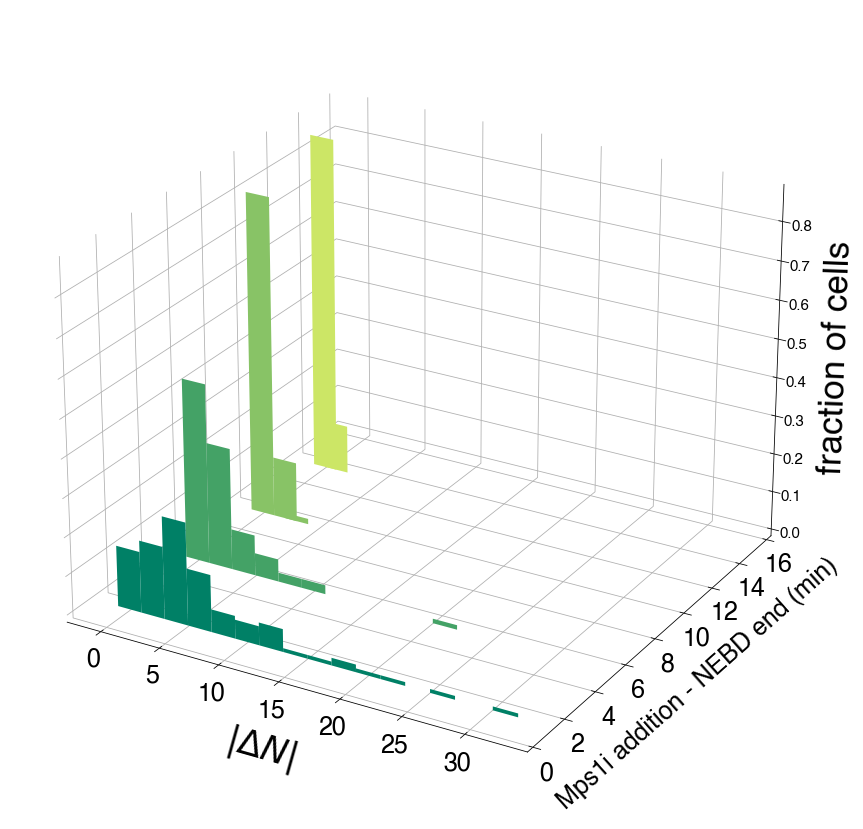

In [8]:
cmap = plt.cm.get_cmap('summer')
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
nbins = 46
for c, z in zip(np.linspace(0,0.8,4), [0,4,8,12]):
    ys = cleaned_df_ctrl[(cleaned_df_ctrl['Mps1i time - NEBD time'].astype(int)<z+4) & (cleaned_df_ctrl['Mps1i time - NEBD time'].astype(int)>=z)]['dNk']
    hist, bins = np.histogram(ys, bins=max(int(np.max(ys)),1),density=True)
    xs = (bins[:-1] + bins[1:])/2
    ax.bar(xs, hist, zs=z+1, zdir='y',color=cmap(c), alpha=1,width=2)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.tick_params(axis='x',labelsize=25)
ax.tick_params(axis='y',labelsize=25)
ax.tick_params(axis='z',labelsize=15)
ax.set_ylim([0,16])
ax.set_xlabel(r'$|\Delta N|$',size=35,labelpad=25)
ax.set_ylabel('Mps1i addition - NEBD end (min)',size=25,labelpad=18)
ax.set_zlabel('fraction of cells',size=35,labelpad=15)
ax.grid(False)
ax.grid(axis='z')
ax.view_init(25, 300)

## Figure 2F: Plot of experimental $\langle(\Delta N)^2\rangle(t)$ binned in 2 minute intervals and model fit

RPE1
k_b 0.55+/-0.08
A 0.9979+/-0.0010
cb 0.44+/-0.15
ke 0.0012+/-0.0007


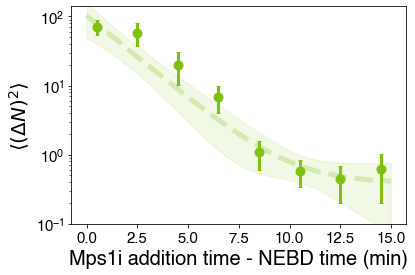

In [9]:
plot_expo_with_error_unp(dict_ctrl,'#7ec211','RPE1')
plt.ylim([10e-2,140]);

# Figure 3

## Figure 3C: Anaphase onset times fit to an analytical distribution of the slowest first passage time

control
k_b 0.55+/-0.04
cb (0+/-4)e+05
t_off (0+/-9)e+05


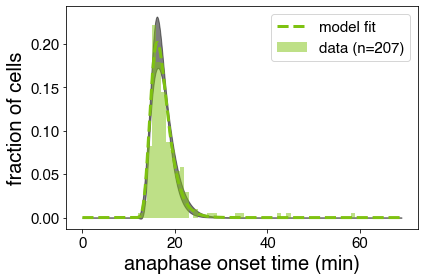

In [10]:
plot_only_symm_gumbel(anaphase_times_ctrl,'#7ec211','control',p0=[0.4,0.5,10])
plt.legend();
plt.tight_layout();

# Figure 4

## Figure 4B: Histogram of |ΔN| values for unforced UMK57 cells

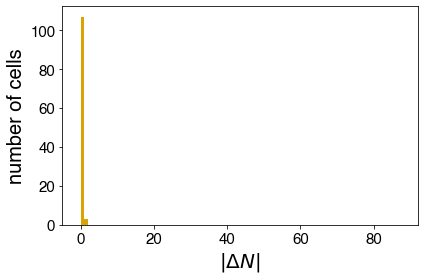

In [11]:
z = 0
data = unforced_dNk_umk
nbins = 2
plt.hist(data,bins=nbins,color= '#dba204');

plt.xlim([-5,92])
plt.xlabel(r'$|\Delta N|$');
plt.ylabel('number of cells');
plt.tight_layout();

## Figure 4C: Histograms of |ΔN| for each UMK57 forced anaphase time

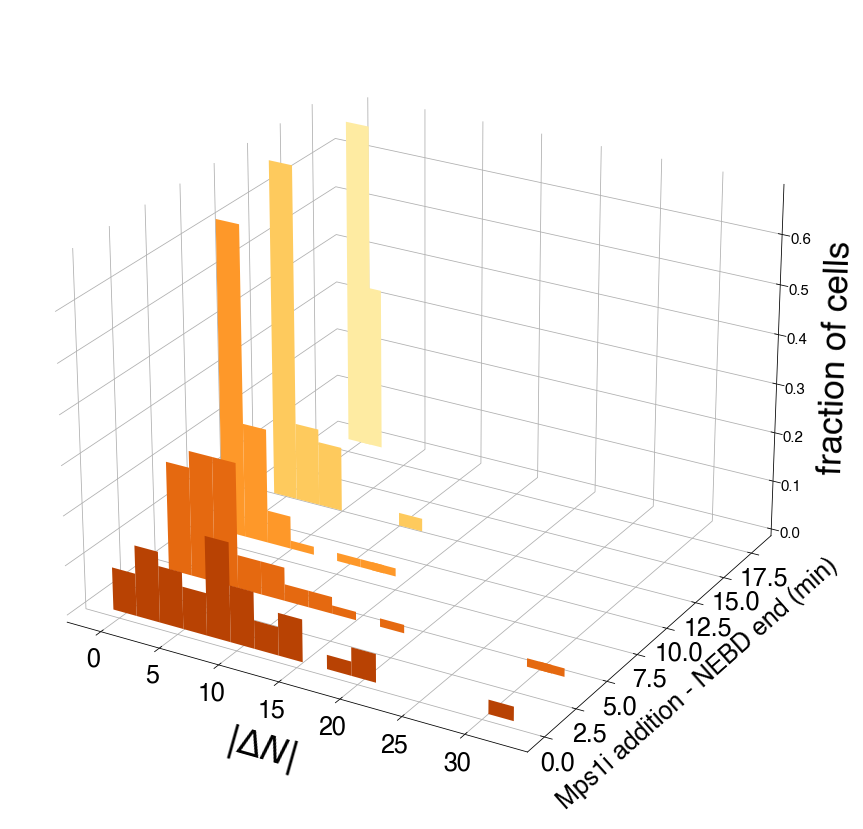

In [12]:
cmap = plt.cm.get_cmap('YlOrBr')
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
nbins = 46
for c, z in zip(np.linspace(0.8,0.2,5), [0,4,8,12,18]):
    ys = cleaned_df_umk[(cleaned_df_umk['Mps1i time - NEBD time'].astype(int)<z+2.5) & (cleaned_df_umk['Mps1i time - NEBD time'].astype(int)>=z)]['dNk']
    hist, bins = np.histogram(ys, bins=max(int(np.max(ys)),1),density=True)
    xs = (bins[:-1] + bins[1:])/2
    ax.bar(xs, hist, zs=z, zdir='y',color=cmap(c), alpha=1,width=2)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.tick_params(axis='x',labelsize=25)
ax.tick_params(axis='y',labelsize=25)
ax.tick_params(axis='z',labelsize=15)
ax.set_xlabel(r'$|\Delta N|$',size=35,labelpad=25)
ax.set_ylabel('Mps1i addition - NEBD end (min)',size=25,labelpad=18)
ax.set_zlabel('fraction of cells',size=35,labelpad=15)
ax.grid(False)
ax.grid(axis='z')
ax.view_init(25, 300)

## Figure 4D: Anaphase time histogram and kinetochore count error correction curve for UMK57 (orange) vs control (green)

control
k_b 0.550+/-0.019
ke 0.00115+/-0.00028
cb 0.44+/-0.07
t_off 10.28+/-0.27
CEinit 25.6+/-3.3
UMK57
k_b 0.278+/-0.010
ke 0.0047+/-0.0017
cb 0.24+/-0.05
t_off 5.2+/-0.5
CEinit 34.9+/-2.4


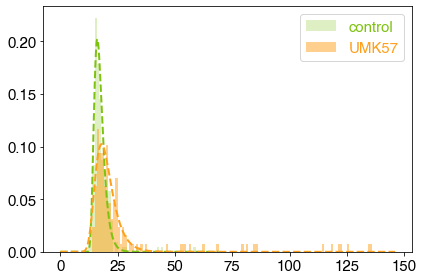

In [13]:
plot_symm_gumbel_fullnorm_piecewise(dict_ctrl,anaphase_times_ctrl,colorname='#7ec211',labelname='control',which_plot='gumbel',alpha=0.5,confidence=False)
plot_symm_gumbel_fullnorm_piecewise(dict_umk,anaphase_times_umk,colorname='#ffa01c',labelname='UMK57',shape='^',which_plot='gumbel',confidence=False)
plt.legend(loc='upper right',labelcolor=['#7ec211','#ffa01c']);
plt.tight_layout();

control
k_b 0.550+/-0.019
ke 0.00115+/-0.00028
cb 0.44+/-0.07
t_off 10.28+/-0.27
CEinit 25.6+/-3.3
UMK57
k_b 0.278+/-0.010
ke 0.0047+/-0.0017
cb 0.24+/-0.05
t_off 5.2+/-0.5
CEinit 34.9+/-2.4


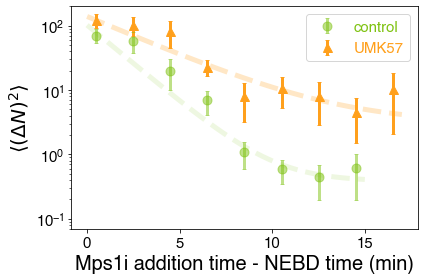

In [14]:
plot_symm_gumbel_fullnorm_piecewise(dict_ctrl,anaphase_times_ctrl,colorname='#7ec211',labelname='control',which_plot='expo',alpha=0.5,confidence=False)
plot_symm_gumbel_fullnorm_piecewise(dict_umk,anaphase_times_umk,colorname='#ffa01c',labelname='UMK57',shape='^',which_plot='expo',confidence=False)
plt.ylim([0.07,200])
plt.legend(loc='upper right',labelcolor=['#7ec211','#ffa01c']);
plt.tight_layout();

## Figure 4F: Histogram of |ΔN| values for unforced monastrol washout cells

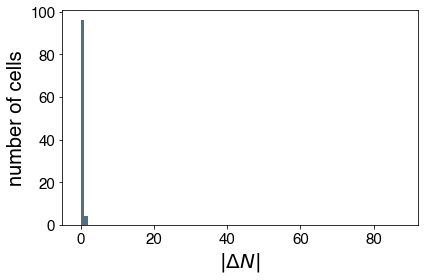

In [15]:
z = 0
data = cleaned_df_mon[cleaned_df_mon['AZ addition time (min)']=='no Mps1i']['dNk'].astype(int)
nbins = 2
plt.hist(data,bins=nbins,color= '#546e8a');
plt.xlim([-5,92])
plt.xlabel(r'$|\Delta N|$');
plt.ylabel('number of cells');
plt.tight_layout();

## Figure 4G: Histograms of |ΔN| for each monastrol washout forced anaphase time

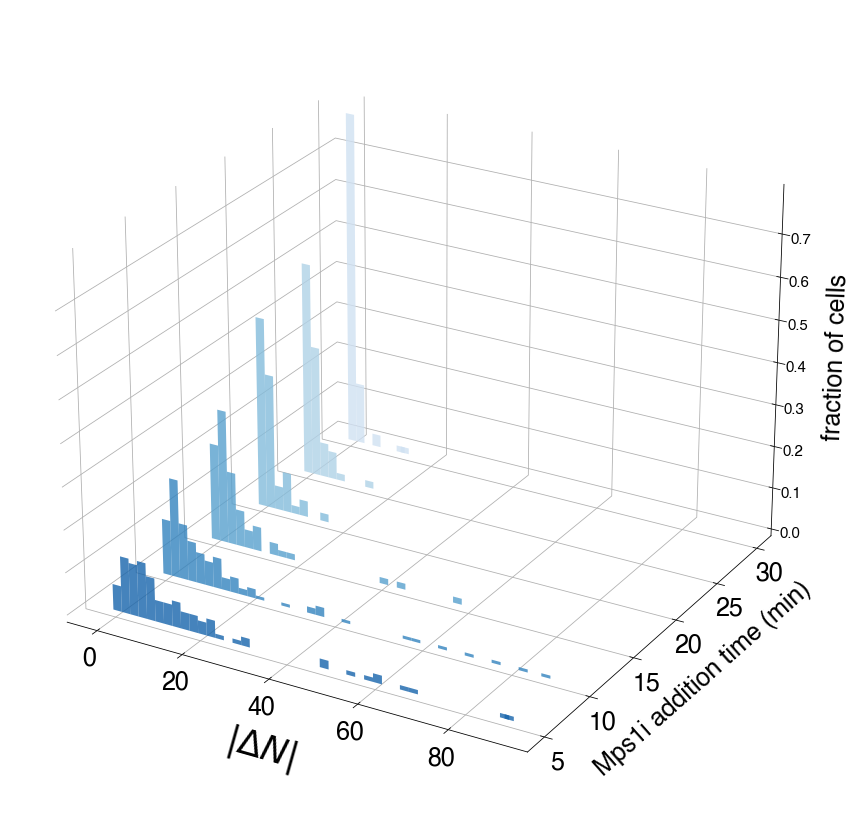

In [16]:
cmap = plt.cm.get_cmap('Blues')

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
nbins = 46
for c, z in zip(np.linspace(0.8,0.2,6), [5,10,15,20,25,30]):
    ys = cleaned_df_mon[cleaned_df_mon['AZ addition time (min)']==str(z)+' min']['dNk']
    hist, bins = np.histogram(ys, bins=int(np.max(ys)),density=True)
    xs = (bins[:-1] + bins[1:])/2
    ax.bar(xs, hist, zs=z, zdir='y',color=cmap(c), alpha=0.8,width=2)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
ax.tick_params(axis='x',labelsize=25)
ax.tick_params(axis='y',labelsize=25)
ax.tick_params(axis='z',labelsize=15)
ax.set_xlabel(r'$|\Delta N|$',size=35,labelpad=25)
ax.set_ylabel('  Mps1i addition time (min)',size=25,labelpad=18)
ax.set_zlabel('fraction of cells',size=25,labelpad=15)
ax.grid(False)
ax.grid(axis='z')
ax.view_init(25, 300)

## Figure 4H: Anaphase time histogram and kinetochore count error correction curve for monastrol washout (blue) vs. control (green).

control
k_b 0.550+/-0.019
ke 0.00115+/-0.00028
cb 0.44+/-0.07
t_off 10.28+/-0.27
CEinit 25.6+/-3.3


/Applications/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


monastrol washout
k_b 0.146+/-0.028
ke 0.0000+/-0.0014
cb 0.0+/-1.1
t_off 6+/-4
asymm (6.1+/-1.7)e+02


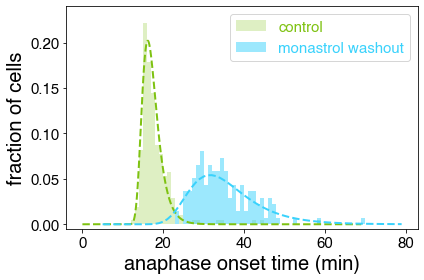

In [17]:
plot_symm_gumbel_fullnorm_piecewise(dict_ctrl,anaphase_times_ctrl,colorname='#7ec211',labelname='control',which_plot='gumbel',alpha=0.5,confidence=False)
plot_asymm_gumbel_ke_binom_piecewise(dict_mon,anaphase_times_mon-2,colorname='#3ad2fc',labelname='monastrol washout',shape='s',which_plot='gumbel')
plt.xlabel('anaphase onset time (min)')
plt.ylabel('fraction of cells')
plt.legend(loc='upper right',labelcolor=['#7ec211','#3ad2fc']);
plt.ylim([-0.005,0.24])
plt.tight_layout();

control
k_b 0.550+/-0.019
ke 0.00115+/-0.00028
cb 0.44+/-0.07
t_off 10.28+/-0.27
CEinit 25.6+/-3.3


/Applications/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


monastrol washout
k_b 0.146+/-0.028
ke 0.0000+/-0.0014
cb 0.0+/-1.1
t_off 6+/-4
asymm (6.1+/-1.7)e+02


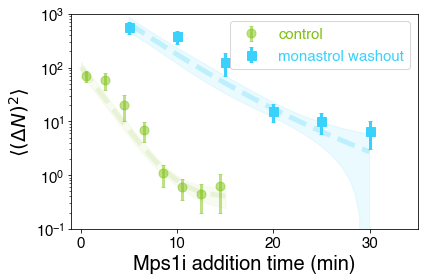

In [18]:
plot_symm_gumbel_fullnorm_piecewise(dict_ctrl,anaphase_times_ctrl,colorname='#7ec211',labelname='control',which_plot='expo',alpha=0.5)
plot_asymm_gumbel_ke_binom_piecewise(dict_mon,anaphase_times_mon-2,colorname='#3ad2fc',labelname='monastrol washout',shape='s',which_plot='expo')
plt.ylim([10e-2,1000])
plt.xlim([-1,35])
plt.xlabel('Mps1i addition time (min)')
plt.legend(loc='upper right',labelcolor=['#7ec211','#3ad2fc']);
plt.tight_layout();

# Figure S1

## Figure S1Ai: Unforced (no Mps1i added) kinetochore count difference distribution for control RPE1 cells with Mad2 RNAi knockdown 

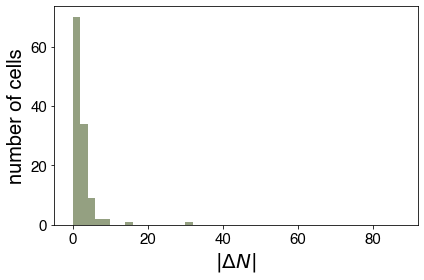

In [19]:
data = cleaned_df_mad2['dNk']
nbins = int((np.unique(data)[-1]-np.unique(data)[0]))//2
plt.hist(data,bins=nbins,color='#2b4205',alpha=0.5)
plt.xlabel(r'$|\Delta N|$')
plt.ylabel('number of cells');
plt.xlim([-5,92])
plt.tight_layout();

## Figure S1Aii: Unforced anaphase times for control RPE1 cells with and without Mad2 RNAi knockdown. 

mean anaphase time without Mad2 RNAi:  17.59 +/- 0.34
mean anaphase time with Mad2 RNAi:  9.66 +/- 0.29


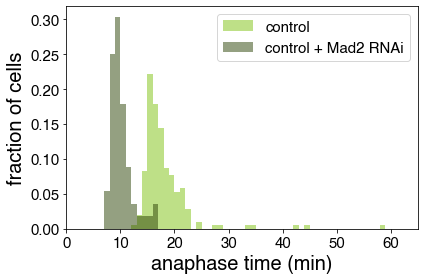

In [20]:
anaphase_times = anaphase_times_ctrl
nbins = int((np.unique(anaphase_times)[-1]-np.unique(anaphase_times)[0]))
plt.hist(anaphase_times,bins=nbins,density=True,alpha=0.5,color='#7ec211',label='control')
print('mean anaphase time without Mad2 RNAi: ',round(np.mean(anaphase_times),2),'+/-',round(st.sem(anaphase_times),2))

anaphase_times = anaphase_times_mad2
nbins = int((np.unique(anaphase_times)[-1]-np.unique(anaphase_times)[0]))
plt.hist(anaphase_times,bins=nbins,density=True,alpha=0.5,color='#2b4205',label='control + Mad2 RNAi')
print('mean anaphase time with Mad2 RNAi: ',round(np.mean(anaphase_times),2),'+/-',round(st.sem(anaphase_times),2))

plt.xlim([0,65])
plt.xlabel('anaphase time (min)')
plt.ylabel('fraction of cells');
plt.legend();
plt.tight_layout();

## Figure S1Aiii: Mean squared kinetochore count difference vs. mean anaphase onset time for unforced control cells with Mad2 RNAi knockdown overlaid on forced anaphase $\langle(\Delta N)^2\rangle(t)$ curve for control cells without Mad2 RNAi. 

control + Mps1i
k_b 0.550+/-0.019
ke 0.00115+/-0.00028
cb 0.44+/-0.07
t_off 10.28+/-0.27
CEinit 25.6+/-3.3


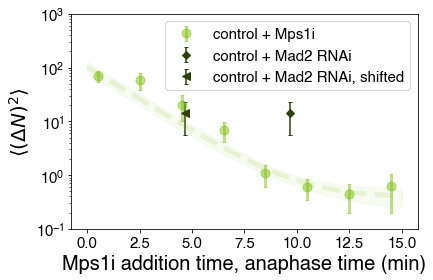

In [21]:
plot_symm_gumbel_fullnorm_piecewise(dict_ctrl,anaphase_times_ctrl,colorname='#7ec211',labelname='control + Mps1i',which_plot='expo',alpha=0.5)
plt.errorbar([np.mean(anaphase_times_mad2)],[np.mean(cleaned_df_mad2['dNk']**2)],yerr=[st.sem(cleaned_df_mad2['dNk']**2)],fmt='D',markersize=5,c='#2b4205',label='control + Mad2 RNAi')
plt.errorbar([np.mean(anaphase_times_mad2)-5],[np.mean(cleaned_df_mad2['dNk']**2)],yerr=[st.sem(cleaned_df_mad2['dNk']**2)],fmt='<',markersize=8,c='#2b4205',label='control + Mad2 RNAi, shifted')
plt.xlabel('Mps1i addition time, anaphase time (min)')
plt.ylim([10e-2,10e2])
plt.legend()
plt.tight_layout();


## Figure S1Bi: Unforced |∆N| for Mad2 RNAi cells with 1uM UMK57

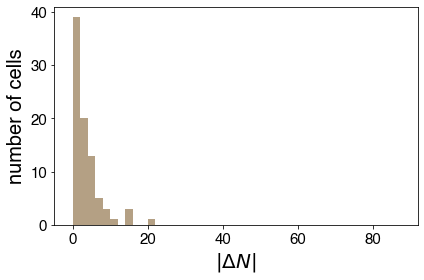

In [22]:
data = cleaned_df_mad2_umk['dNk']
nbins = int((np.unique(data)[-1]-np.unique(data)[0]))//2
plt.hist(data,bins=nbins,color='#6b430b',alpha=0.5)
plt.xlabel(r'$|\Delta N|$')
plt.ylabel('number of cells');
plt.xlim([-5,92])
plt.tight_layout();

## Figure S1Bii: Unforced anaphase times for 1uM UMK57 cells with and without Mad1 RNAi

mean anaphase time without Mad2 RNAi:  29.66 +/- 2.37
mean anaphase time with Mad2 RNAi:  11.06 +/- 0.42


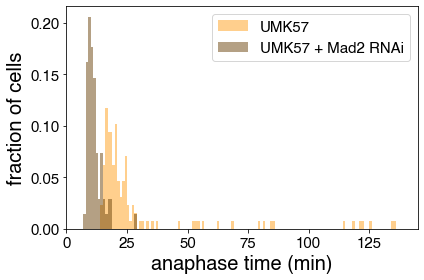

In [23]:
anaphase_times = anaphase_times_umk

nbins = int((np.unique(anaphase_times)[-1]-np.unique(anaphase_times)[0]))
plt.hist(anaphase_times,bins=nbins,density=True,alpha=0.5,label='UMK57',color='#ffa01c')
print('mean anaphase time without Mad2 RNAi: ',round(np.mean(anaphase_times),2),'+/-',round(st.sem(anaphase_times),2))

anaphase_times = anaphase_times_mad2_umk
nbins = int((np.unique(anaphase_times)[-1]-np.unique(anaphase_times)[0]))
plt.hist(anaphase_times,bins=nbins,density=True,alpha=0.5,color='#6b430b',label='UMK57 + Mad2 RNAi')
print('mean anaphase time with Mad2 RNAi: ',round(np.mean(anaphase_times),2),'+/-',round(st.sem(anaphase_times),2))

plt.xlim([0,145])
plt.xlabel('anaphase time (min)')
plt.ylabel('fraction of cells');
plt.legend();
plt.tight_layout();

## Figure S1Biii: $\langle(\Delta N)^2\rangle$ vs. mean anaphase time for Mad2 RNAi+UMK57 cells overlaid on forced anaphase $\langle(\Delta N)^2\rangle(t)$ curve. 

UMK57 + Mps1i
k_b 0.278+/-0.010
ke 0.0047+/-0.0017
cb 0.24+/-0.05
t_off 5.2+/-0.5
CEinit 34.9+/-2.4


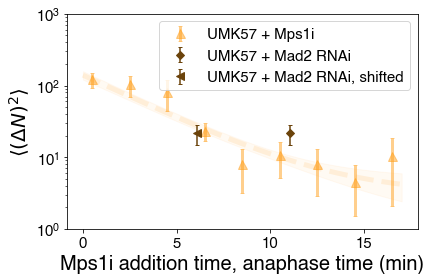

In [24]:
plot_symm_gumbel_fullnorm_piecewise(dict_umk,anaphase_times_umk,colorname='#ffa01c',labelname='UMK57 + Mps1i',shape='^',which_plot='expo',alpha=0.5)
plt.errorbar([np.mean(anaphase_times_mad2_umk)],[np.mean(cleaned_df_mad2_umk['dNk']**2)],yerr=[st.sem(cleaned_df_mad2_umk['dNk']**2)],fmt='D',markersize=5,c='#6b430b',label='UMK57 + Mad2 RNAi')
plt.errorbar([np.mean(anaphase_times_mad2_umk)-5],[np.mean(cleaned_df_mad2_umk['dNk']**2)],yerr=[st.sem(cleaned_df_mad2_umk['dNk']**2)],fmt='<',markersize=8,c='#6b430b',label='UMK57 + Mad2 RNAi, shifted')
plt.xlabel('Mps1i addition time, anaphase time (min)')
plt.legend()
plt.ylim([10e-1,1000])
plt.tight_layout();


## Figure S1Ci: Unforced |∆N| for Mad2 RNAi cells after washout from monastrol incubation

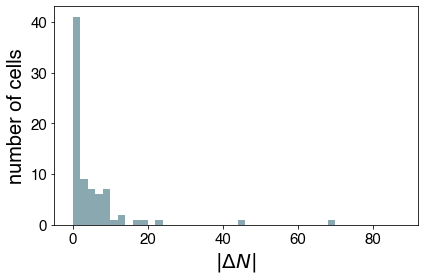

In [25]:
data = cleaned_df_mad2_mon['dNk']
nbins = int((np.unique(data)[-1]-np.unique(data)[0]))//2
plt.hist(data,bins=nbins,color='#165363',alpha=0.5)
plt.xlabel(r'$|\Delta N|$')
plt.ylabel('number of cells');
plt.xlim([-5,92])
plt.tight_layout();

## Figure S1Cii: Anaphase onset times relative to monastrol washout times for cells with and without Mad2 RNAi

mean anaphase time without Mad2 RNAi:  34.55 +/- 0.62
89
mean anaphase time with Mad2 RNAi:  20.03 +/- 0.89


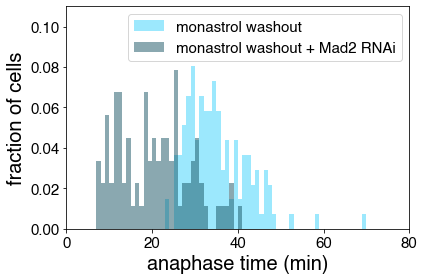

In [26]:
anaphase_times = anaphase_times_mon-2

nbins = int((np.unique(anaphase_times)[-1]-np.unique(anaphase_times)[0]))
print('mean anaphase time without Mad2 RNAi: ',round(np.mean(anaphase_times),2),'+/-',round(st.sem(anaphase_times),2))
plt.hist(anaphase_times,bins=nbins,density=True,alpha=0.5,color='#3ad2fc',label='monastrol washout')


anaphase_times = anaphase_times_mad2_mon-2
nbins = int((np.unique(anaphase_times)[-1]-np.unique(anaphase_times)[0]))
plt.hist(anaphase_times,bins=nbins,density=True,alpha=0.5,color='#165363',label='monastrol washout + Mad2 RNAi')
print(len(anaphase_times))

print('mean anaphase time with Mad2 RNAi: ',round(np.mean(anaphase_times),2),'+/-',round(st.sem(anaphase_times),2))
plt.xlabel('anaphase time (min)')
plt.ylabel('fraction of cells');
plt.legend();
plt.xlim([0,80])
plt.ylim([0,0.11])
plt.tight_layout();


## Figure S1Ciii: $\langle(\Delta N)^2\rangle$ vs. mean anaphase time for Mad2 RNAi monastrol washout cells binned in 5 minute bins overlaid on forced anaphase $\langle(\Delta N)^2\rangle(t)$ curve for monastrol washout cells

/Applications/anaconda3/lib/python3.8/site-packages/scipy/stats/_discrete_distns.py:69: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


monastrol + Mps1i
k_b 0.146+/-0.028
ke 0.0000+/-0.0014
cb 0.0+/-1.1
t_off 6+/-4
asymm (6.1+/-1.7)e+02


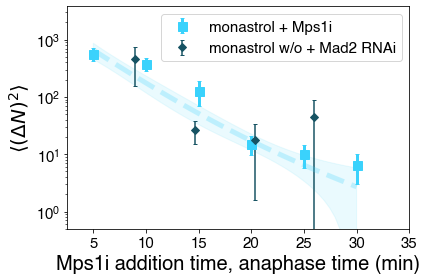

In [27]:
plot_asymm_gumbel_ke_binom_piecewise(dict_mon,anaphase_times_mon-2,colorname='#3ad2fc',labelname='monastrol + Mps1i',shape='s',which_plot='expo')
plt.errorbar(dict_mad2_mon['times'],dict_mad2_mon['means'],yerr=dict_mad2_mon['sems'],fmt='D',markersize=5,c='#165363',label='monastrol w/o + Mad2 RNAi')
plt.xlabel('Mps1i addition time, anaphase time (min)')
plt.legend(loc='upper right');
plt.ylim([0.5,3800])
plt.xlim([2.5,35])
plt.tight_layout();